Подключим библиотеки:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Откром и исправим набор данных:

In [54]:
PATH = "creditcard_2023_reduced.csv"
dataset = pd.read_csv(PATH)

Для построение модели будет построен график зависимости инерции от количества кластеров:

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

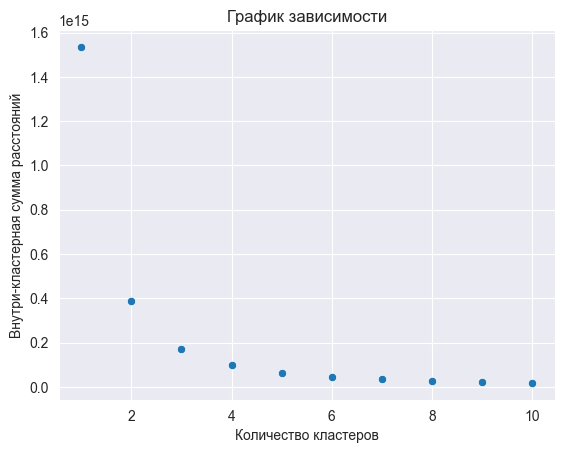

In [55]:
inertia = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(dataset)
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(
    x = [x for x in range(1, 11)],
    y = inertia
)

plt.title("График зависимости")
plt.xlabel("Количество кластеров")
plt.ylabel("Внутри-кластерная сумма расстояний")

Оптимальное количество кластеров, на основе графика - 2. Построим модель, делящую данные на 2 кластера:

In [56]:
CLUSTERS = 2

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(dataset)

clusters = pd.DataFrame(
    columns=dataset.columns,
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,426941.096675,-0.504648,0.491283,-0.684089,0.737514,-0.341671,-0.447028,-0.493502,0.153150,-0.586146,-0.678779,0.731680,-0.773222,-0.069017,-0.808855,-0.035585,-0.582496,-0.484696,-0.419427,0.250817,0.191841,0.097232,0.029973,0.011719,-0.130156,0.057334,0.071947,0.218049,0.109335,28387,0.999683
1,142603.518283,0.509032,-0.487745,0.673193,-0.732212,0.344163,0.434788,0.485172,-0.144464,0.583682,0.670810,-0.716026,0.772565,0.066477,0.800286,0.034404,0.567808,0.476065,0.407202,-0.241010,-0.174575,-0.110082,-0.017021,-0.007376,0.135262,-0.062448,-0.068530,-0.215175,-0.105259,28476,0.001651


Отобразим графически в 2D:

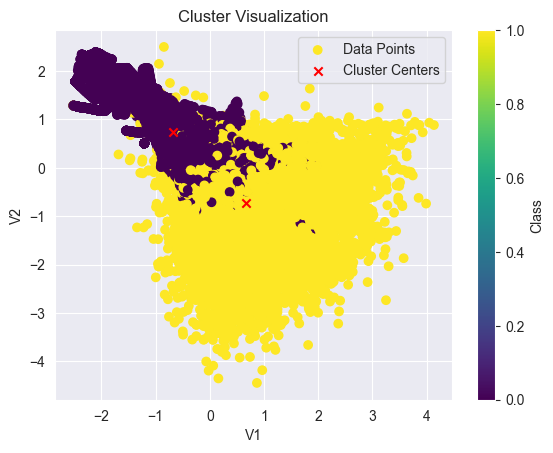

In [59]:
fig, ax = plt.subplots()

scatter = ax.scatter(dataset["V3"], dataset["V4"], c=model.labels_, cmap="viridis", label="Data Points")
cbar = plt.colorbar(scatter)
cbar.set_label("Class")
ax.scatter(clusters["V3"], clusters["V4"], c="red", marker="x", label="Cluster Centers")

ax.set_xlabel("V1")
ax.set_ylabel("V2")
ax.set_title("Cluster Visualization")

ax.legend()

plt.show()

Отобразим графически:

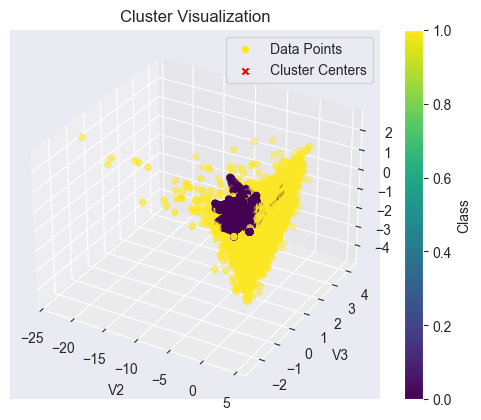

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(dataset["V2"], dataset["V3"], dataset["V4"], c=model.labels_, cmap="viridis", label="Data Points")

cbar = plt.colorbar(scatter)
cbar.set_label("Class")

ax.scatter(clusters["V2"], clusters["V3"], clusters["V4"], c="red", marker="x", label="Cluster Centers")

ax.set_xlabel("V2")
ax.set_ylabel("V3")
ax.set_zlabel("V4")
ax.set_title("Cluster Visualization")

ax.legend()

plt.show()